# <center> ИССЛЕДОВАНИЕ ДАННЫХ HR-АГЕНТСТВА

HR-агентство изучает тренды на рынке труда в IT. Компания хочет провести исследование на основе данных о зарплатах в сфере Data Science за 2020–2022 годы и получить некоторые выводы.

Исследуйте данные и сделайте выводы по полученным результатам. Подкрепите свои рассуждения и выводы визуализациями и с помощью статистического тестирования проверьте, являются ли выводы статистически значимыми.

Продемонстрируйте использование разных тестов для проверки статистической значимости сделанных выводов:
* тесты для количественного признака:
    - для одной выборки;
    - для двух выборок;
    - для нескольких выборок;
* тест для категориальных признаков.

## Постановка задачи

1. Выяснить, какие факторы влияют на зарплату специалиста Data Scientist.

2. Ответить на ключевые вопросы HR-агентства:
- Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?
- Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?
- Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?
- Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?
- Если вы найдёте в данных интересные закономерности, также отметьте их в своём анализе.

На каждый вопрос необходимо ответить с уровнем значимости $\alpha=0.05$.

Данные содержат следующие столбцы:

* work_year — Год, в котором была выплачена зарплата;
* experience_level — Опыт работы на этой должности в течение года со следующими возможными значениями:
    - EN (Entry-level/Junio),
    - MI (Mid-level/Intermediate),
    - SE (Senior-level/Expert),
    - EX (Executive-level/Director);
* employment_type — Тип трудоустройства для этой роли:
    - PT (неполный рабочий день),
    - FT (полный рабочий день),
    - CT (контракт),
    - FL (фриланс);
* job_title — Роль, в которой соискатель работал в течение года;
* salary — Общая выплаченная валовая сумма заработной платы;
* salary_currency — Валюта выплачиваемой заработной платы в виде кода валюты ISO 4217;
* salary_in_usd — Зарплата в долларах США (валютный курс, делённый на среднее значение курса доллара США за соответствующий год через fxdata.foorilla.com);
* employee_residence — Основная страна проживания сотрудника в течение рабочего года в виде кода страны ISO 3166;
* remote_ratio — Общий объём работы, выполняемой удалённо. Возможные значения:
    - 0 - (удалённой работы нет (менее 20 %)),
    - 50 - (частично удалённая работа),
    - 100 - (полностью удалённая работа (более 80 %));
* company_location — Страна главного офиса работодателя или филиала по контракту в виде кода страны ISO 3166.
* company_size — Среднее количество людей, работавших в компании в течение года:
    - S - (менее 50 сотрудников (небольшая компания)),
    - M - (от 50 до 250 сотрудников (средняя компания)),
    - L - (более 250 сотрудников (крупная компания)).

Оригинальный датасет: ["Data Science Job Salaries” (kaggle.com)"](https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries)   


## Загрузка данных

In [3]:
# загружаем необходимые библиотеки
import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.api as sm
from statsmodels import stats as sms

import matplotlib.pyplot as plt
import seaborn as sns

# делаем визуальную настройку графиков
sns.set_theme("notebook") 
sns.set_palette("Set2") 

Данные были скачены по [ссылке](https://lms.skillfactory.ru/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block@ds_salaries.zip).

In [4]:
# загружаем датасет
data = pd.read_csv('data/ds_salaries.csv')
data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [5]:
display(data.value_counts('job_title'))

job_title
Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Director of Data Science                      7
AI Scientist                                  7
Principal Data Scientist                      7
Data Science Consultant                       7
Data Analytics Manager                        7
Computer Vision Engineer                      6
BI Data Analyst                               6
ML Engineer                                   6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Applied Data Scientist        

In [6]:
# задаём уровень значимости
alpha = 0.05 
print("Уровень значимости alpha = {:.2f}".format(alpha))

Уровень значимости alpha = 0.05


## Описательный анализ данных

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


В датасете 607 записей (без пропущенных значений).

Проверим данные на наличие полных дубликатов:

In [8]:
print('Количество дубликатов: {}'.format(data[data.duplicated()].shape[0]))

# Удаляем дубликаты:
data = data.drop_duplicates()
print('Размер таблицы после удаления дубликатов: {}'.format(data.shape))

Количество дубликатов: 0
Размер таблицы после удаления дубликатов: (607, 12)


Удалим признаки 'salary' и 'salary_currency', так как есть универсальный признак salary_in_usd, который поддаётся статестической оработке.

Так же можно удалить признак 'Unnamed: 0', который не представляет важности для статистического анализа.

In [9]:
# Удаляем столбцы "salary" и "salary_currency" из DataFrame
data = data.drop(columns=['salary', 'salary_currency', 'Unnamed: 0'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary_in_usd       607 non-null    int64 
 5   employee_residence  607 non-null    object
 6   remote_ratio        607 non-null    int64 
 7   company_location    607 non-null    object
 8   company_size        607 non-null    object
dtypes: int64(3), object(6)
memory usage: 42.8+ KB


Проведём корреляционный анализ датасета

<Axes: >

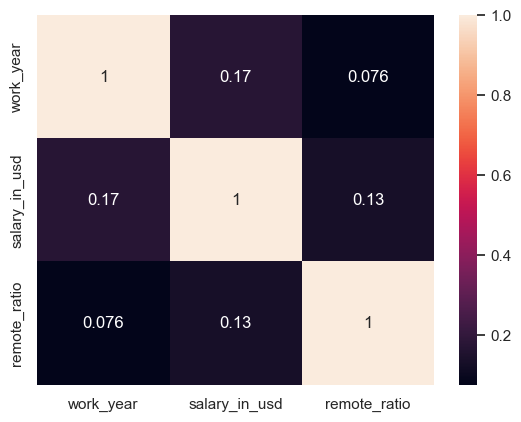

In [10]:
# отсеиваем числовые признаки и включаем отображение коэффициентов
sns.heatmap(data.corr(numeric_only=True), annot=True)

В датасете нет сильно скоррелированных признаков, которые подлежали бы исключению.

#### Классификация признаков датасета на числовые и категориальные

Категориальные признаки:

- work_year;
- experience_level;
- employment_type;
- job_title;
- employee_residence;
- remote_ratio;
- company_location.
- company_size.

Численные признаки:

- salary_in_usd.

### Основные статистические характеристики для каждого из признаков

Построим отчет с использованием библиотеки sweetviz для определения основных статестических характеристик прзнаков.

In [11]:
import sweetviz as sv
report = sv.analyze(data)
report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Визуальный анализ данных

#### Распределение оплаты труда по всем соискателям по профессии Data Scientist за 2020-2022 годы

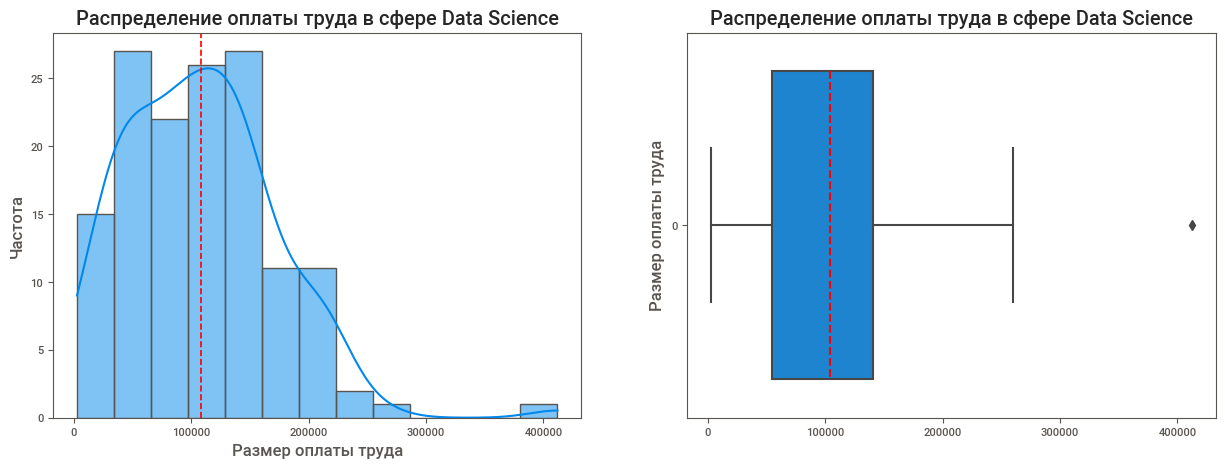

In [12]:
scientist_data = data[data['job_title'] == 'Data Scientist']

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(scientist_data['salary_in_usd'], kde=True, ax=axes[0])
axes[0].set(xlabel='Размер оплаты труда', ylabel='Частота')
axes[0].set_title('Распределение оплаты труда в сфере Data Science')
axes[0].axvline(scientist_data['salary_in_usd'].mean(), color='red', linestyle='--', linewidth=1.2)

sns.boxplot(scientist_data['salary_in_usd'], ax=axes[1], orient='h', medianprops={"color": "red", "linestyle": '--'})
axes[1].set(ylabel='Размер оплаты труда')
axes[1].set_title('Распределение оплаты труда в сфере Data Science')

plt.show()

In [13]:
data_agg = scientist_data['salary_in_usd'].describe().round(2).to_frame()
data_agg.columns = ['Размер оплаты труда']
data_agg

,Размер оплаты труда
count,143.00
mean,108187.83
std,64112.84
min,2859.00
25%,54724.00
50%,103691.00
75%,140850.00
max,412000.00


Распределение оплаты труда отлично от нормального, имеются выбросы.

#### Распределение оплаты труда по всем соискателям по профессии Data Engineer за 2020-2022 годы

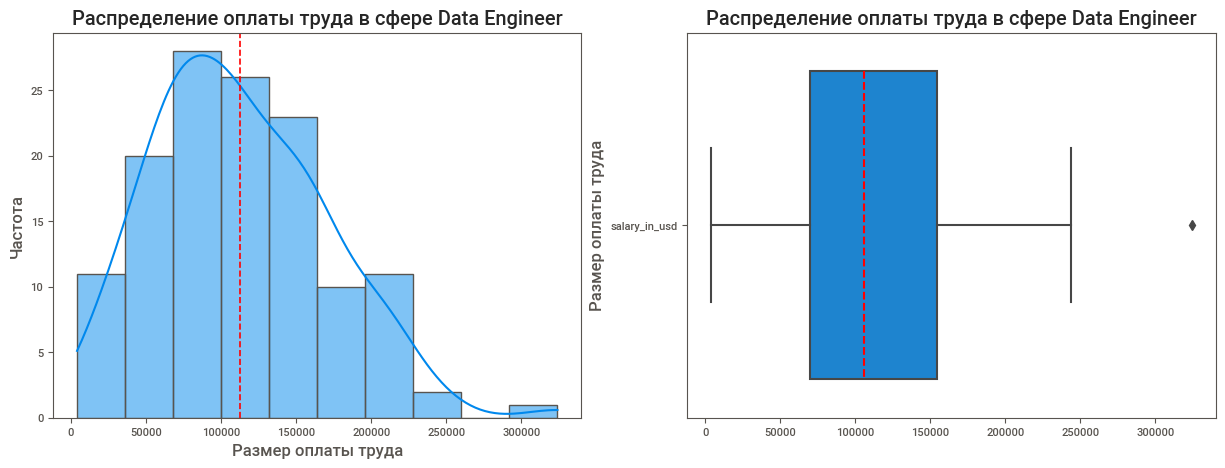

In [14]:
engineer_data = data[data['job_title'] == 'Data Engineer']

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(engineer_data['salary_in_usd'], kde=True, ax=axes[0])
axes[0].set(xlabel='Размер оплаты труда', ylabel='Частота')
axes[0].set_title('Распределение оплаты труда в сфере Data Engineer')
axes[0].axvline(engineer_data['salary_in_usd'].mean(), color='red', linestyle='--', linewidth=1.2)

# Удаляем столбцы "work_year" и "remote_ratio" из DataFrame
engineer_data_df = engineer_data.drop(columns=['work_year', 'remote_ratio'])

sns.boxplot(engineer_data_df, ax=axes[1], orient='h', medianprops={"color": "red", "linestyle": '--'})
axes[1].set(ylabel='Размер оплаты труда')
axes[1].set_title('Распределение оплаты труда в сфере Data Engineer')

plt.show()

In [15]:
data_agg = engineer_data['salary_in_usd'].describe().round(2).to_frame()
data_agg.columns = ['Размер оплаты труда']
data_agg

,Размер оплаты труда
count,132.00
mean,112725.00
std,57629.08
min,4000.00
25%,70039.50
50%,105500.00
75%,154600.00
max,324000.00


Распределение оплаты труда отлично от нормального, имеются выбросы.

### Оплата труда профессии Data Scientist от года, в котором была выплачена зарплата.

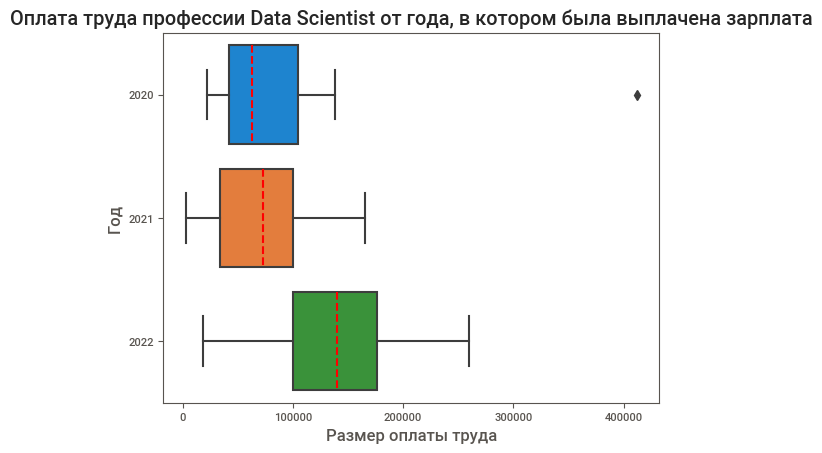

In [16]:
ax = sns.boxplot(scientist_data, x='salary_in_usd', y='work_year', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер оплаты труда', ylabel='Год')
plt.title('Оплата труда профессии Data Scientist от года, в котором была выплачена зарплата')
plt.show()

In [17]:
data_agg = scientist_data.groupby('work_year')['salary_in_usd'].describe().round(2)
print('Оплата труда профессии Data Scientist от года, в котором была выплачена зарплата')
data_agg

Оплата труда профессии Data Scientist от года, в котором была выплачена зарплата


,count,mean,std,min,25%,50%,75%,max
work_year,,,,,,,,
2020,21.0,85970.52,81436.65,21669.0,42197.0,62726.0,105000.0,412000.0
2021,45.0,70671.73,45422.97,2859.0,33808.0,73000.0,100000.0,165000.0
2022,77.0,136172.09,54563.08,18442.0,100000.0,140000.0,176000.0,260000.0


In [18]:
data_agg = scientist_data.groupby('work_year')['salary_in_usd'].median().round(2)
print('Оплата труда медианная профессии Data Scientist от года, в котором была выплачена зарплата')
data_agg

Оплата труда медианная профессии Data Scientist от года, в котором была выплачена зарплата


work_year
2020     62726.0
2021     73000.0
2022    140000.0
Name: salary_in_usd, dtype: float64

Распределение оплаты труда по году, в котором была выплачена зарплата, имеет тенденцию к увеличению медианных значений, но различны средние значения.

Чтобы определить, являются ли эти различия статистически значимыми, в следующем разделе мы проведём статистические тесты.

### Оплата труда профессии Data Scientist от опыта работы соискателя.

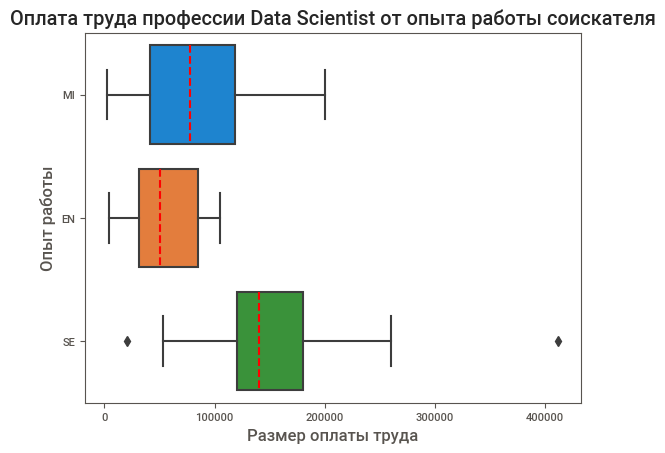

In [19]:
ax = sns.boxplot(scientist_data, x='salary_in_usd', y='experience_level', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер оплаты труда', ylabel='Опыт работы')
plt.title('Оплата труда профессии Data Scientist от опыта работы соискателя')
plt.show()

In [20]:
data_agg = scientist_data.groupby('experience_level')['salary_in_usd'].describe().round(2)
print('Оплата труда профессии Data Scientist от опыта работы соискателя')
data_agg

Оплата труда профессии Data Scientist от опыта работы соискателя


,count,mean,std,min,25%,50%,75%,max
experience_level,,,,,,,,
EN,22.0,55330.91,31237.82,4000.0,31474.0,50483.5,85027.25,105000.0
MI,60.0,82039.13,46869.58,2859.0,41768.0,77479.0,118264.75,200000.0
SE,61.0,152971.02,58985.40,20171.0,120000.0,140400.0,180000.00,412000.0


Среднее значение оплаты труда увеличивается с опытом работы соискателя.

Чтобы определить, являются ли эти различия статистически значимыми, в следующем разделе мы проведём статистические тесты.

### Оплата труда профессии Data Scientist от типа трудоустройства.

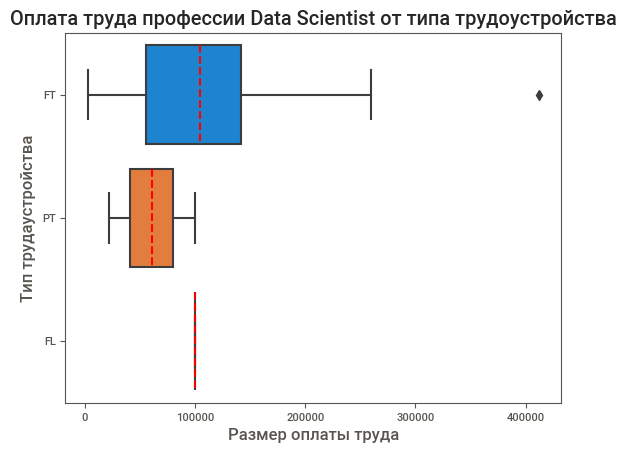

In [21]:
ax = sns.boxplot(scientist_data, x='salary_in_usd', y='employment_type', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер оплаты труда', ylabel='Тип трудаустройства')
plt.title('Оплата труда профессии Data Scientist от типа трудоустройства')
plt.show()

In [22]:
data_agg = scientist_data.groupby('employment_type')['salary_in_usd'].describe().round(2)
print('Оплата труда профессии Data Scientist от типа трудоустройства')
data_agg

Оплата труда профессии Data Scientist от типа трудоустройства


,count,mean,std,min,25%,50%,75%,max
employment_type,,,,,,,,
FL,1.0,100000.00,NaN,100000.0,100000.00,100000.0,100000.00,100000.0
FT,140.0,108922.79,64372.43,2859.0,55490.00,104796.0,141975.00,412000.0
PT,2.0,60834.50,55388.38,21669.0,41251.75,60834.5,80417.25,100000.0


Оплаты труда различна для разных типов трудоустройства.

Но выборки для PT (неполный рабочий день) и FL (фриланс) менее 3х, поэтому проверить на нормальность тестами будет не возможно, следовательно статистические тесты проводить нет смысла.

### Оплата труда профессии Data Scientist от страны проживания.

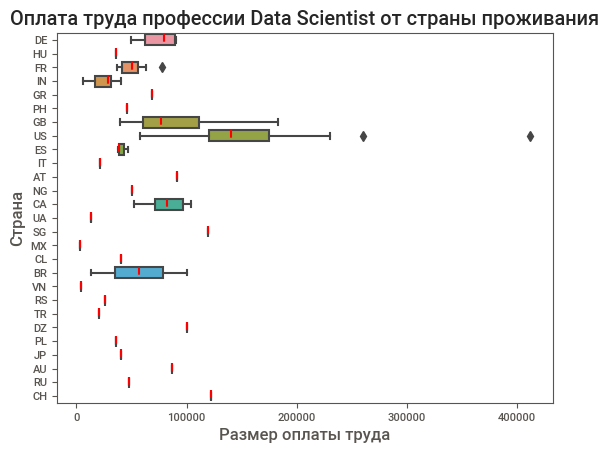

In [23]:
ax = sns.boxplot(scientist_data, x='salary_in_usd', y='employee_residence', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер оплаты труда', ylabel='Страна')
plt.title('Оплата труда профессии Data Scientist от страны проживания')
plt.show()

In [24]:
data_agg = scientist_data.groupby('employee_residence')['salary_in_usd'].describe().round(2)
print('Оплата труда профессии Data Scientist от страны проживания')
data_agg.sort_values('count', ascending=False)

Оплата труда профессии Data Scientist от страны проживания


,count,mean,std,min,25%,50%,75%,max
employee_residence,,,,,,,,
US,78.0,149408.33,52576.02,58000.0,120000.00,140000.0,174500.00,412000.0
GB,11.0,88177.36,41393.50,39263.0,60847.00,76958.0,110808.00,183228.0
IN,9.0,23838.33,11758.72,5679.0,16904.00,28399.0,31615.00,40481.0
FR,8.0,51665.62,13412.16,36643.0,41626.75,50483.5,55575.50,77684.0
DE,7.0,74773.71,16834.87,49268.0,62096.50,79833.0,89694.00,90734.0
CA,6.0,81489.17,19500.74,52396.0,70945.50,81756.0,96934.50,103691.0
ES,3.0,41136.67,4935.34,37825.0,38300.50,38776.0,42792.50,46809.0
BR,2.0,56450.50,61588.29,12901.0,34675.75,56450.5,78225.25,100000.0
NG,1.0,50000.00,NaN,50000.0,50000.00,50000.0,50000.00,50000.0


In [25]:
# Сформируем список с выборкой больше 2х
popular_employee_residence =scientist_data['employee_residence'].value_counts().loc[lambda x : x > 2]
print(popular_employee_residence)
# Оставим страны с выборкой более 2х
scientist_data_per = scientist_data.copy()
scientist_data_per['employee_residence'] = scientist_data_per['employee_residence'].apply(lambda x: x if x in popular_employee_residence else 'other')
scientist_data_per = scientist_data_per[scientist_data_per['employee_residence'] != 'other']
display(scientist_data_per)

employee_residence
US    78
GB    11
IN     9
FR     8
DE     7
CA     6
ES     3
Name: count, dtype: int64


,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
10,2020,EN,FT,Data Scientist,51321,FR,0,FR,S
11,2020,MI,FT,Data Scientist,40481,IN,0,IN,L
12,2020,EN,FT,Data Scientist,39916,FR,0,FR,M
46,2020,MI,FT,Data Scientist,76958,GB,100,GB,S
...,...,...,...,...,...,...,...,...,...
592,2022,SE,FT,Data Scientist,230000,US,100,US,M
593,2022,SE,FT,Data Scientist,150000,US,100,US,M
596,2022,SE,FT,Data Scientist,210000,US,100,US,M
598,2022,MI,FT,Data Scientist,160000,US,100,US,M


In [26]:
data_agg = scientist_data_per.groupby('employee_residence')['salary_in_usd'].describe().round(2)
print('Оплата труда профессии Data Scientist от страны проживания')
data_agg.sort_values('count', ascending=False)

Оплата труда профессии Data Scientist от страны проживания


,count,mean,std,min,25%,50%,75%,max
employee_residence,,,,,,,,
US,78.0,149408.33,52576.02,58000.0,120000.00,140000.0,174500.0,412000.0
GB,11.0,88177.36,41393.50,39263.0,60847.00,76958.0,110808.0,183228.0
IN,9.0,23838.33,11758.72,5679.0,16904.00,28399.0,31615.0,40481.0
FR,8.0,51665.62,13412.16,36643.0,41626.75,50483.5,55575.5,77684.0
DE,7.0,74773.71,16834.87,49268.0,62096.50,79833.0,89694.0,90734.0
CA,6.0,81489.17,19500.74,52396.0,70945.50,81756.0,96934.5,103691.0
ES,3.0,41136.67,4935.34,37825.0,38300.50,38776.0,42792.5,46809.0


Оплаты труда различна для разных стран.

Чтобы определить, являются ли эти различия статистически значимыми, необходимы статистические тесты.

### Оплата труда профессии Data Scientist от доли работы, выполняемой удаленно.

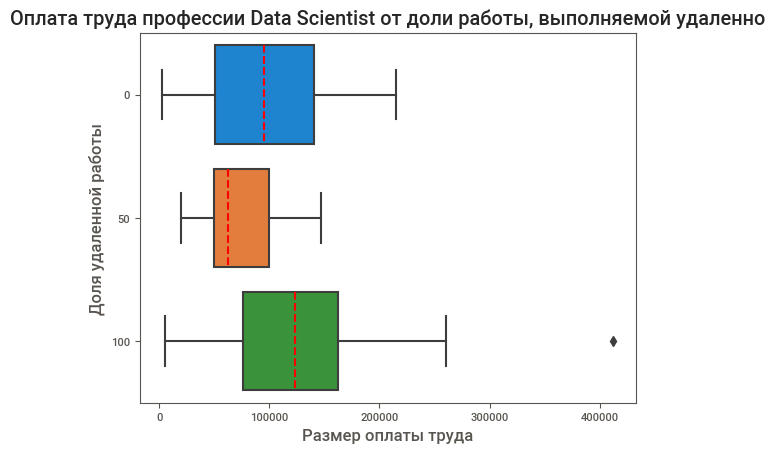

In [27]:
ax = sns.boxplot(scientist_data, x='salary_in_usd', y='remote_ratio', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер оплаты труда', ylabel='Доля удаленной работы')
plt.title('Оплата труда профессии Data Scientist от доли работы, выполняемой удаленно')
plt.show()

In [28]:
data_agg = scientist_data.groupby('remote_ratio')['salary_in_usd'].describe().round(2)
print('Оплата труда профессии Data Scientist от доли работы, выполняемой удаленно')
data_agg

Оплата труда профессии Data Scientist от доли работы, выполняемой удаленно


,count,mean,std,min,25%,50%,75%,max
remote_ratio,,,,,,,,
0,39.0,99520.74,58259.42,2859.0,50294.5,95550.0,140400.0,215300.0
50,25.0,74504.08,35602.82,20171.0,49646.0,62726.0,100000.0,147000.0
100,79.0,123125.94,69370.99,5679.0,76366.0,123000.0,162500.0,412000.0


In [29]:
data_agg = scientist_data.groupby('remote_ratio')['salary_in_usd'].median().round(2)
print('Оплата труда профессии Data Scientist от доли работы, выполняемой удаленно')
data_agg

Оплата труда профессии Data Scientist от доли работы, выполняемой удаленно


remote_ratio
0       95550.0
50      62726.0
100    123000.0
Name: salary_in_usd, dtype: float64

Среднее значение оплаты труда отличается в зависимости от доли работы, выполняемой удаленно.

Чтобы определить, являются ли эти различия статистически значимыми, необходимы статистические тесты.

### Оплата труда профессии Data Scientist от страны, где размещен главный офис компании.

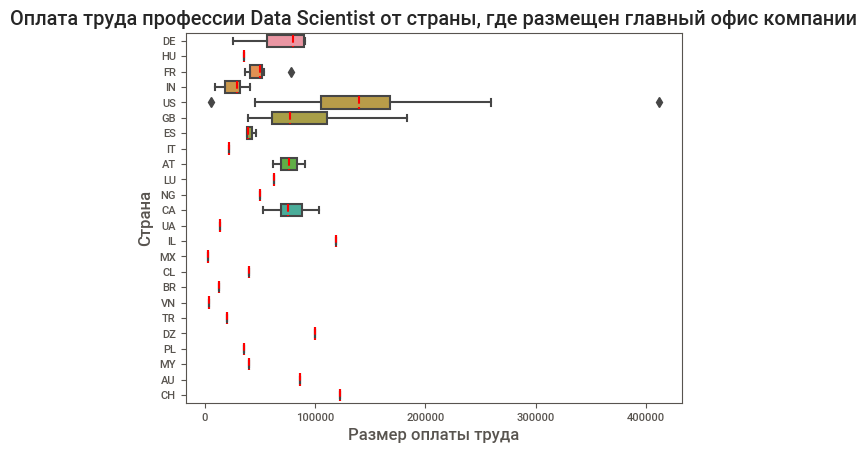

In [30]:
ax = sns.boxplot(scientist_data, x='salary_in_usd', y='company_location', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер оплаты труда', ylabel='Страна')
plt.title('Оплата труда профессии Data Scientist от страны, где размещен главный офис компании')
plt.show()

In [31]:
data_agg = scientist_data.groupby('company_location')['salary_in_usd'].describe().round(2)
print('Оплата труда профессии Data Scientist от страны, где размещен главный офис компании')
data_agg.sort_values('count', ascending=False)

Оплата труда профессии Data Scientist от страны, где размещен главный офис компании


,count,mean,std,min,25%,50%,75%,max
company_location,,,,,,,,
US,84.0,143115.68,56252.98,5679.0,105000.0,140000.0,167750.00,412000.0
GB,11.0,88177.36,41393.50,39263.0,60847.0,76958.0,110808.00,183228.0
IN,8.0,26108.25,10248.05,9466.0,18057.5,29075.0,32163.25,40481.0
DE,7.0,69640.14,25045.56,25532.0,55997.0,79833.0,89694.00,90734.0
FR,7.0,50085.57,13658.91,36643.0,41056.5,49646.0,52256.50,77684.0
CA,5.0,77787.00,19301.65,52396.0,69336.0,75774.0,87738.00,103691.0
ES,3.0,41136.67,4935.34,37825.0,38300.5,38776.0,42792.50,46809.0
AT,2.0,76352.00,21050.57,61467.0,68909.5,76352.0,83794.50,91237.0
LU,1.0,62726.00,NaN,62726.0,62726.0,62726.0,62726.00,62726.0


In [32]:
# Сформируем список с выборкой больше 2х
popular_company_location =scientist_data['company_location'].value_counts().loc[lambda x : x > 2]
print(popular_company_location)
# Оставим страны с выборкой более 2х
scientist_data_permain = scientist_data.copy()
scientist_data_permain['company_location'] = scientist_data_permain['company_location'].apply(lambda x: x if x in popular_company_location else 'other')
scientist_data_permain = scientist_data_permain[scientist_data_permain['company_location'] != 'other']
display(scientist_data_permain)

company_location
US    84
GB    11
IN     8
DE     7
FR     7
CA     5
ES     3
Name: count, dtype: int64


,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
10,2020,EN,FT,Data Scientist,51321,FR,0,FR,S
11,2020,MI,FT,Data Scientist,40481,IN,0,IN,L
12,2020,EN,FT,Data Scientist,39916,FR,0,FR,M
32,2020,SE,FT,Data Scientist,68428,GR,100,US,L
...,...,...,...,...,...,...,...,...,...
592,2022,SE,FT,Data Scientist,230000,US,100,US,M
593,2022,SE,FT,Data Scientist,150000,US,100,US,M
596,2022,SE,FT,Data Scientist,210000,US,100,US,M
598,2022,MI,FT,Data Scientist,160000,US,100,US,M


In [33]:
data_agg = scientist_data_permain.groupby('company_location')['salary_in_usd'].describe().round(2)
print('Оплата труда профессии Data Scientist от страны, где размещен главный офис компании')
data_agg.sort_values('count', ascending=False)

Оплата труда профессии Data Scientist от страны, где размещен главный офис компании


,count,mean,std,min,25%,50%,75%,max
company_location,,,,,,,,
US,84.0,143115.68,56252.98,5679.0,105000.0,140000.0,167750.00,412000.0
GB,11.0,88177.36,41393.50,39263.0,60847.0,76958.0,110808.00,183228.0
IN,8.0,26108.25,10248.05,9466.0,18057.5,29075.0,32163.25,40481.0
DE,7.0,69640.14,25045.56,25532.0,55997.0,79833.0,89694.00,90734.0
FR,7.0,50085.57,13658.91,36643.0,41056.5,49646.0,52256.50,77684.0
CA,5.0,77787.00,19301.65,52396.0,69336.0,75774.0,87738.00,103691.0
ES,3.0,41136.67,4935.34,37825.0,38300.5,38776.0,42792.50,46809.0


Оплаты труда различна для разных стран, где размещен главный офис компании.

Чтобы определить, являются ли эти различия статистически значимыми, необходимы статистические тесты.

### Оплата труда профессии Data Scientist от размера компании.

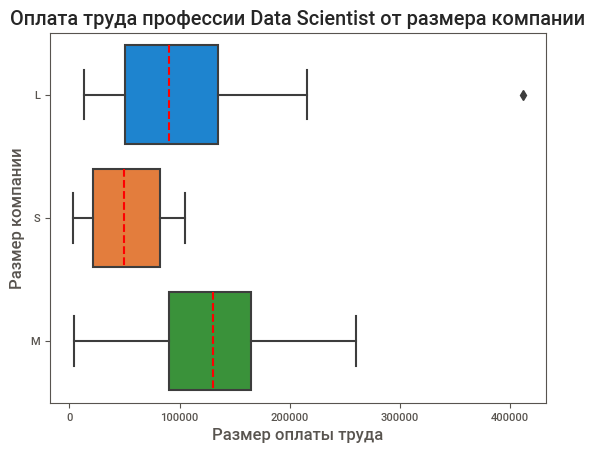

In [34]:
ax = sns.boxplot(scientist_data, x='salary_in_usd', y='company_size', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер оплаты труда', ylabel='Размер компании')
plt.title('Оплата труда профессии Data Scientist от размера компании')
plt.show()

In [35]:
data_agg = scientist_data.groupby('company_size')['salary_in_usd'].describe().round(2)
print('Оплата труда профессии Data Scientist от размера компании')
data_agg

Оплата труда профессии Data Scientist от размера компании


,count,mean,std,min,25%,50%,75%,max
company_size,,,,,,,,
L,45.0,103313.36,71815.18,13400.0,50000.0,90734.0,135000.0,412000.0
M,77.0,126380.75,56389.53,4000.0,90000.0,130000.0,165000.0,260000.0
S,21.0,51925.76,33216.29,2859.0,21669.0,49268.0,82500.0,105000.0


In [36]:
data_agg = scientist_data.groupby('company_size')['salary_in_usd'].median().round(2)
print('Оплата труда профессии Data Scientist от размера компании')
data_agg

Оплата труда профессии Data Scientist от размера компании


company_size
L     90734.0
M    130000.0
S     49268.0
Name: salary_in_usd, dtype: float64

Оплаты труда различна для разных размеров компаний.

Чтобы определить, являются ли эти различия статистически значимыми, необходимы статистические тесты.

#### Распределение оплаты труда по всем соискателям профессий Data Scientist и Data Engineer за 2020-2022 годы

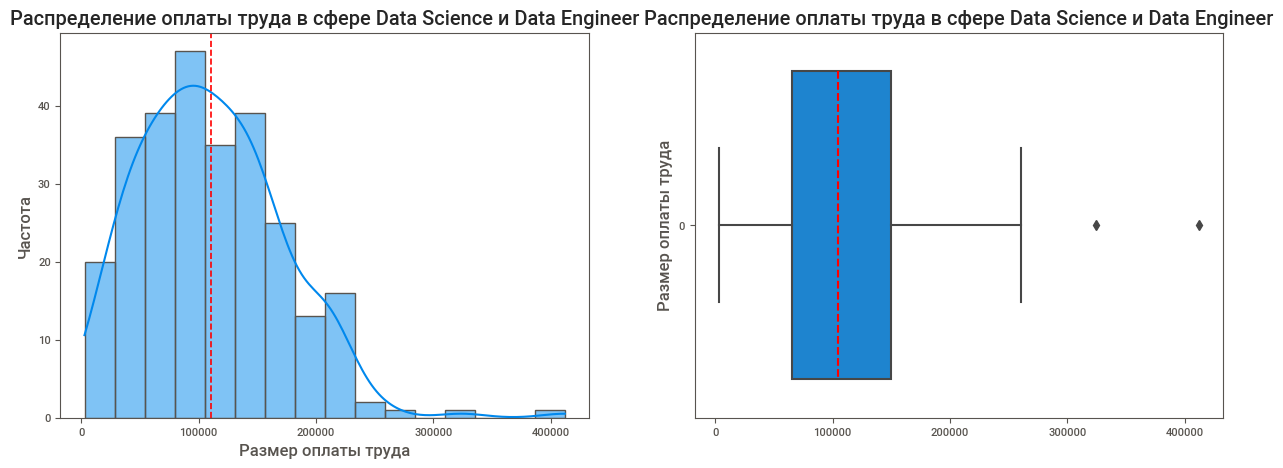

In [37]:
scientist_engineer_data = data[(data['job_title'] == 'Data Scientist') | (data['job_title'] == 'Data Engineer')]

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(scientist_engineer_data['salary_in_usd'], kde=True, ax=axes[0])
axes[0].set(xlabel='Размер оплаты труда', ylabel='Частота')
axes[0].set_title('Распределение оплаты труда в сфере Data Science и Data Engineer')
axes[0].axvline(scientist_engineer_data['salary_in_usd'].mean(), color='red', linestyle='--', linewidth=1.2)

sns.boxplot(scientist_engineer_data['salary_in_usd'], ax=axes[1], orient='h', medianprops={"color": "red", "linestyle": '--'})
axes[1].set(ylabel='Размер оплаты труда')
axes[1].set_title('Распределение оплаты труда в сфере Data Science и Data Engineer')

plt.show()

In [38]:
data_agg = engineer_data['salary_in_usd'].describe().round(2).to_frame()
data_agg.columns = ['Размер оплаты труда']
data_agg

,Размер оплаты труда
count,132.00
mean,112725.00
std,57629.08
min,4000.00
25%,70039.50
50%,105500.00
75%,154600.00
max,324000.00


Распределение оплаты труда отлично от нормального, имеются выбросы.

### Оплата труда профессии Data Scientist и Data Engineer по году, в котором была выплачена зарплата.

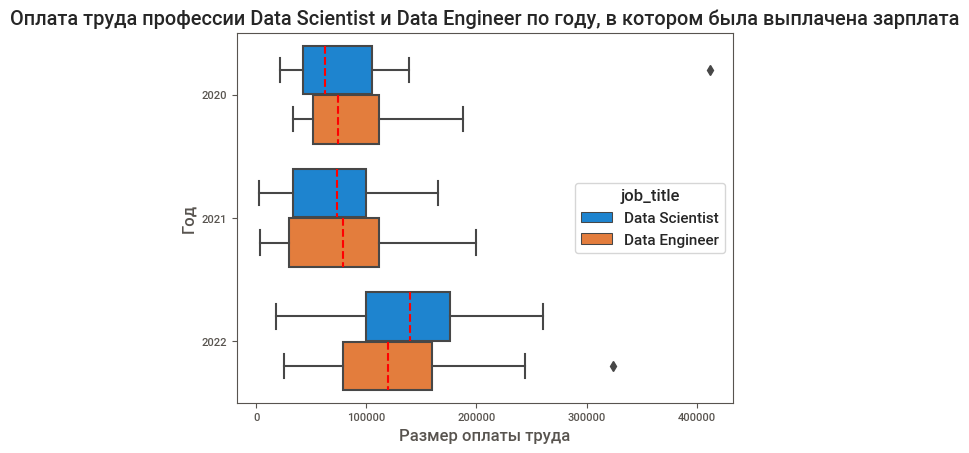

In [39]:
ax = sns.boxplot(scientist_engineer_data, x='salary_in_usd', y='work_year', orient='h', medianprops={"color": "red", "linestyle": '--'}, hue='job_title')
ax.set(xlabel='Размер оплаты труда', ylabel='Год')
plt.title('Оплата труда профессии Data Scientist и Data Engineer по году, в котором была выплачена зарплата')
plt.show()

In [40]:
data_agg = scientist_engineer_data.groupby(['work_year', 'job_title'])['salary_in_usd'].describe().round(2)
print('Оплата труда профессии Data Scientist и Data Engineer от года, в котором была выплачена зарплата')
data_agg

Оплата труда профессии Data Scientist и Data Engineer от года, в котором была выплачена зарплата


count       mean       std      min       25%  \
work_year job_title                                                       
2020      Data Engineer    11.0   88162.00  46473.12  33511.0   51320.5   
          Data Scientist   21.0   85970.52  81436.65  21669.0   42197.0   
2021      Data Engineer    32.0   83202.53  52926.53   4000.0   29940.0   
          Data Scientist   45.0   70671.73  45422.97   2859.0   33808.0   
2022      Data Engineer    89.0  126375.70  55954.40  25000.0   78526.0   
          Data Scientist   77.0  136172.09  54563.08  18442.0  100000.0   

                               50%        75%       max  
work_year job_title                                      
2020      Data Engineer    74130.0  111436.00  188000.0  
          Data Scientist   62726.0  105000.00  412000.0  
2021      Data Engineer    78416.5  111831.25  200000.0  
          Data Scientist   73000.0  100000.00  165000.0  
2022      Data Engineer   120000.0  160000.00  324000.0  
          Data Scientist  140000.0  176000.00  260000.0

In [41]:
data_agg = scientist_engineer_data.groupby(['work_year', 'job_title'])['salary_in_usd'].median().round(2)
print('Оплата труда медианная профессии Data Scientist и Data Engineer от года, в котором была выплачена зарплата')
data_agg

Оплата труда медианная профессии Data Scientist и Data Engineer от года, в котором была выплачена зарплата


work_year  job_title     
2020       Data Engineer      74130.0
           Data Scientist     62726.0
2021       Data Engineer      78416.5
           Data Scientist     73000.0
2022       Data Engineer     120000.0
           Data Scientist    140000.0
Name: salary_in_usd, dtype: float64

Распределение оплаты труда по году, в котором была выплачена зарплата, имеет тенденцию к увеличению медианных значений, но различны средние значения.

Чтобы определить, являются ли эти различия статистически значимыми, в следующем разделе мы проведём статистические тесты.

### Оплата труда профессии Data Scientist и Data Engineer от размера компании.

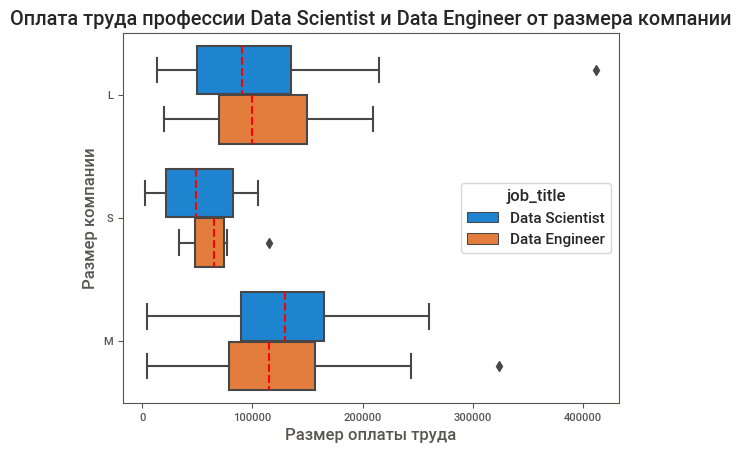

In [42]:
ax = sns.boxplot(scientist_engineer_data, x='salary_in_usd', y='company_size', orient='h', medianprops={"color": "red", "linestyle": '--'}, hue='job_title')
ax.set(xlabel='Размер оплаты труда', ylabel='Размер компании')
plt.title('Оплата труда профессии Data Scientist и Data Engineer от размера компании')
plt.show()

In [43]:
data_agg = scientist_engineer_data.groupby(['company_size', 'job_title'])['salary_in_usd'].describe().round(2)
print('Оплата труда профессии Data Scientist и Data Engineer от размера компании')
data_agg

Оплата труда профессии Data Scientist и Data Engineer от размера компании


count       mean       std      min       25%  \
company_size job_title                                                       
L            Data Engineer    37.0  104255.97  56225.27  20000.0  69741.00   
             Data Scientist   45.0  103313.36  71815.18  13400.0  50000.00   
M            Data Engineer    89.0  119372.74  58153.33   4000.0  78526.00   
             Data Scientist   77.0  126380.75  56389.53   4000.0  90000.00   
S            Data Engineer     6.0   66342.50  28862.47  33511.0  47516.75   
             Data Scientist   21.0   51925.76  33216.29   2859.0  21669.00   

                                  50%        75%       max  
company_size job_title                                      
L            Data Engineer   100000.0  150000.00  209100.0  
             Data Scientist   90734.0  135000.00  412000.0  
M            Data Engineer   115000.0  156600.00  324000.0  
             Data Scientist  130000.0  165000.00  260000.0  
S            Data Engineer    65511.0   74130.25  115000.0  
             Data Scientist   49268.0   82500.00  105000.0

In [44]:
data_agg = scientist_engineer_data.groupby(['company_size', 'job_title'])['salary_in_usd'].median().round(2)
print('Оплата труда профессии Data Scientist и Data Engineer от размера компании')
data_agg

Оплата труда профессии Data Scientist и Data Engineer от размера компании


company_size  job_title     
L             Data Engineer     100000.0
              Data Scientist     90734.0
M             Data Engineer     115000.0
              Data Scientist    130000.0
S             Data Engineer      65511.0
              Data Scientist     49268.0
Name: salary_in_usd, dtype: float64

Оплата труда различна для мелких и крупных компаний. В средних компаниях наблюдается самый большой ценник как среднего так и медианного значений оплаты труда.

Чтобы определить, являются ли эти различия статистически значимыми, необходимы статистические тесты.

### Количество должностей профессии Data Scientist и Data Engineer от размера компании.

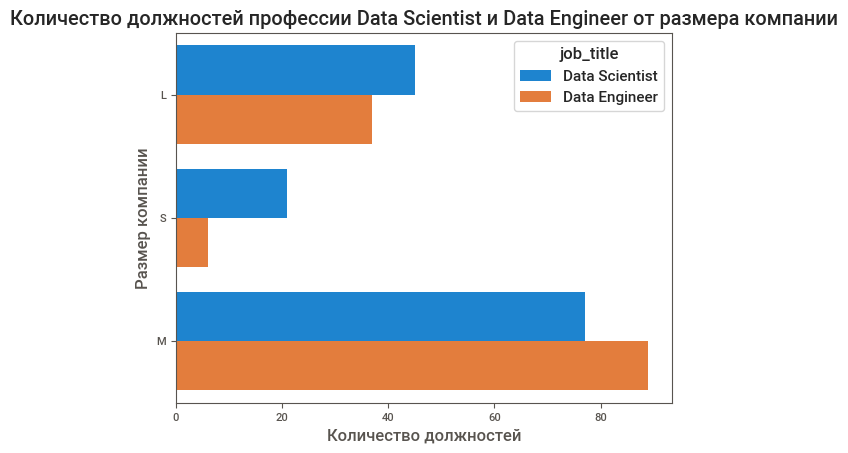

In [45]:
ax = sns.countplot(scientist_engineer_data, y='company_size', hue='job_title')
ax.set(xlabel='Количество должностей', ylabel='Размер компании')
plt.title('Количество должностей профессии Data Scientist и Data Engineer от размера компании')
plt.show()

In [46]:
data_agg = scientist_engineer_data.groupby('company_size')['job_title'].value_counts().round(2)
print('Количество должностей профессии Data Scientist и Data Engineer от размера компании')
data_agg

Количество должностей профессии Data Scientist и Data Engineer от размера компании


company_size  job_title     
L             Data Scientist    45
              Data Engineer     37
M             Data Engineer     89
              Data Scientist    77
S             Data Scientist    21
              Data Engineer      6
Name: count, dtype: int64

Для мелких и крупных компаний преобладает профессия Data Scientist. В средних компаниях преобладает профессии Data Engineer.

Чтобы определить, являются ли эти различия статистически значимыми, необходимы статистические тесты.

### Количество должностей профессии Data Scientist и Data Engineer от опыта работы.

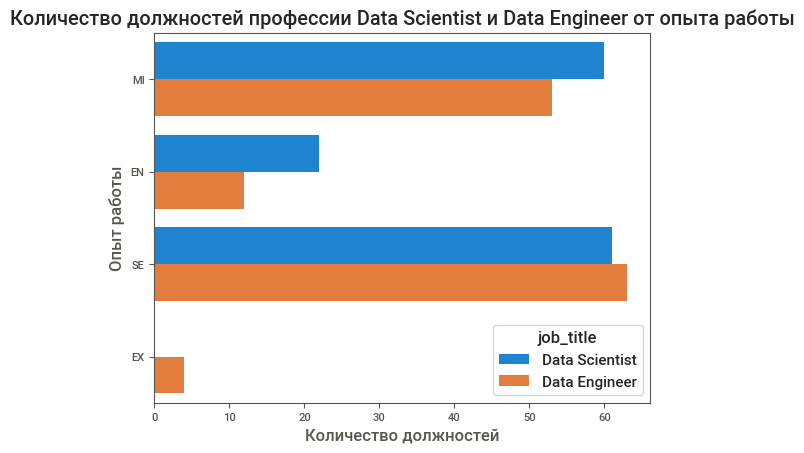

In [47]:
ax = sns.countplot(scientist_engineer_data, y='experience_level', hue='job_title')
ax.set(xlabel='Количество должностей', ylabel='Опыт работы')
plt.title('Количество должностей профессии Data Scientist и Data Engineer от опыта работы')
plt.show()

In [48]:
data_agg = scientist_engineer_data.groupby('experience_level')['job_title'].value_counts().round(2)
print('Количество должностей профессии Data Scientist и Data Engineer от опыта работы')
data_agg

Количество должностей профессии Data Scientist и Data Engineer от опыта работы


experience_level  job_title     
EN                Data Scientist    22
                  Data Engineer     12
EX                Data Engineer      4
MI                Data Scientist    60
                  Data Engineer     53
SE                Data Engineer     63
                  Data Scientist    61
Name: count, dtype: int64

Так как опыт работы EX (Executive-level/Director) только у специалистов профессии Data Engineer и слишком маленькая выборка, исключим ее, и после чтобы определить, являются ли эти различия статистически значимыми, проведем статистические тесты.

## Статистический анализ данных



In [49]:
# функция для принятия решения о нормальности
def decision_normality(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Распределение отлично от нормального'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. Распределение является нормальным'.format(alpha))


# функция для принятия решения об отклонении нулевой гипотезы
def decision_hypothesis(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу в пользу альтернативной.'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))
      

### Влияет ли год на размер оплаты труда профессии Data Scientist?

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза*: размер оплаты труда профессии Data Scientist не отличается по годам: 2020 ($μ_1$), 2021 ($μ_2$), 2022 ($μ_3$).

$$ H_0 : μ_1 = μ_2 = μ_3$$

*Альтернативная гипотеза*: размер оплаты труда профессии Data Scientist отличается по годам: 2020 ($μ_1$), 2021 ($μ_2$), 2022 ($μ_3$).

$$ H_1 : μ_1 \neq μ_2 \neq μ_3$$



**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально.

In [50]:
# значения оплаты труда
salary_year2020 = scientist_data.loc[scientist_data['work_year']==2020, 'salary_in_usd']
salary_year2021 = scientist_data.loc[scientist_data['work_year']==2021, 'salary_in_usd']
salary_year2022 = scientist_data.loc[scientist_data['work_year']==2022, 'salary_in_usd']

# проводим тест Шапиро-Уилка
print('Для 2020:')
result = stats.shapiro(salary_year2020)
decision_normality(result[1])

print('Для 2021:')
result = stats.shapiro(salary_year2021)
decision_normality(result[1])

print('Для 2022:')
result = stats.shapiro(salary_year2022)
decision_normality(result[1])

Для 2020:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Для 2021:
p-value = 0.125
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Для 2022:
p-value = 0.327
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «salary_in_usd»? — Количественный.
* Сколько сравниваемых групп? — Три.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет. 

Для проверки нашей гипотезы можно использовать критерий Краскела — Уоллиса.

**Проведём тест**

In [51]:
# проводим тест
_, p = stats.kruskal(salary_year2020, salary_year2021, salary_year2022)
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод**

Размер оплаты труда профессии Data Scientist отличается по годам.

### Влияет ли опыт работы на размер оплаты труда профессии Data Scientist?

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза*: размер оплаты труда профессии Data Scientist не отличается от опыта работы: EN (Entry-level/Junio) ($μ_1$), MI (Mid-level/Intermediate) ($μ_2$), SE (Senior-level/Expert) ($μ_3$).

$$ H_0 : μ_1 = μ_2 = μ_3$$

*Альтернативная гипотеза*: размер оплаты труда профессии Data Scientist отличается от опыта работы: EN (Entry-level/Junio) ($μ_1$), MI (Mid-level/Intermediate) ($μ_2$), SE (Senior-level/Expert) ($μ_3$).

$$ H_1 : μ_1 \neq μ_2 \neq μ_3$$


**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально.

In [40]:
# значения оплаты труда
salary_en = scientist_data.loc[scientist_data['experience_level']=='EN', 'salary_in_usd']
salary_mi = scientist_data.loc[scientist_data['experience_level']=='MI', 'salary_in_usd']
salary_se = scientist_data.loc[scientist_data['experience_level']=='SE', 'salary_in_usd']

# проводим тест Шапиро-Уилка
print('Для EN (Entry-level/Junio):')
result = stats.shapiro(salary_en)
decision_normality(result[1])

print('Для MI (Mid-level/Intermediate):')
result = stats.shapiro(salary_mi)
decision_normality(result[1])

print('Для SE (Senior-level/Expert):')
result = stats.shapiro(salary_se)
decision_normality(result[1])

Для EN (Entry-level/Junio):
p-value = 0.174
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Для MI (Mid-level/Intermediate):
p-value = 0.178
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Для SE (Senior-level/Expert):
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «salary_in_usd»? — Количественный.
* Сколько сравниваемых групп? — Три.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет. 

Для проверки нашей гипотезы можно использовать критерий Краскела — Уоллиса.

**Проведём тест**

In [ ]:
# проводим тест
_, p = stats.kruskal(salary_en, salary_mi, salary_se)
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод**

Размер оплаты труда профессии Data Scientist отличается от опыта работы специалиста.

### Влияет ли страна проживания на размер оплаты труда профессии Data Scientist?

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза*: размер оплаты труда профессии Data Scientist не отличается от страны проживания: ($μ_1$), ($μ_2$), ($μ_N$).

$$ H_0 : μ_1 = μ_2 = μ_N$$

*Альтернативная гипотеза*: размер оплаты труда профессии Data Scientist отличается от страны проживания: ($μ_1$), ($μ_2$), ($μ_N$).

$$ H_1 : μ_1 \neq μ_2 \neq μ_N$$


**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально.

In [87]:
# значения оплаты труда
salary_us = scientist_data_per.loc[scientist_data_per['employee_residence']=='US', 'salary_in_usd']
salary_gb = scientist_data_per.loc[scientist_data_per['employee_residence']=='GB', 'salary_in_usd']
salary_in = scientist_data_per.loc[scientist_data_per['employee_residence']=='IN', 'salary_in_usd']
salary_fr = scientist_data_per.loc[scientist_data_per['employee_residence']=='FR', 'salary_in_usd']
salary_de = scientist_data_per.loc[scientist_data_per['employee_residence']=='DE', 'salary_in_usd']
salary_ca = scientist_data_per.loc[scientist_data_per['employee_residence']=='CA', 'salary_in_usd']
salary_es = scientist_data_per.loc[scientist_data_per['employee_residence']=='ES', 'salary_in_usd']

# проводим тест Шапиро-Уилка
print('Для US:')
result = stats.shapiro(salary_us)
decision_normality(result[1])

print('Для GB:')
result = stats.shapiro(salary_gb)
decision_normality(result[1])

print('Для IN:')
result = stats.shapiro(salary_in)
decision_normality(result[1])

print('Для FR:')
result = stats.shapiro(salary_fr)
decision_normality(result[1])

print('Для DE:')
result = stats.shapiro(salary_de)
decision_normality(result[1])

print('Для CA:')
result = stats.shapiro(salary_ca)
decision_normality(result[1])

print('Для ES:')
result = stats.shapiro(salary_es)
decision_normality(result[1])

Для US:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Для GB:
p-value = 0.277
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Для IN:
p-value = 0.661
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Для FR:
p-value = 0.444
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Для DE:
p-value = 0.170
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Для CA:
p-value = 0.792
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Для ES:
p-value = 0.184
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «salary_in_usd»? — Количественный.
* Сколько сравниваемых групп? — Семь.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет. 

Для проверки нашей гипотезы можно использовать критерий Краскела — Уоллиса.

**Проведём тест**

In [88]:
# проводим тест
_, p = stats.kruskal(salary_us, salary_gb, salary_in, salary_fr, salary_de, salary_ca, salary_es )
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод**

Размер оплаты труда профессии Data Scientist отличается от страны проживания.

### Влияет ли доля удаленной работы и ее количество на размер оплаты труда профессии Data Scientist?

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза*: размер оплаты труда профессии Data Scientist не отличается от доли удалённой работы: менее 20 % ($μ_1$), частично удалённая ($μ_2$), более 80 % ($μ_3$).

$$ H_0 : μ_1 = μ_2 = μ_3$$

*Альтернативная гипотеза*: размер оплаты труда профессии Data Scientist отличается от доли удалённой работы: менее 20 % ($μ_1$), частично удалённая ($μ_2$), более 80 % ($μ_3$).

$$ H_1 : μ_1 \neq μ_2 \neq μ_3$$


**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально.

In [90]:
# значения оплаты труда
salary_20 = scientist_data.loc[scientist_data['remote_ratio']== 0, 'salary_in_usd']
salary_50 = scientist_data.loc[scientist_data['remote_ratio']== 50, 'salary_in_usd']
salary_80 = scientist_data.loc[scientist_data['remote_ratio']== 100, 'salary_in_usd']

# проводим тест Шапиро-Уилка
print('Для менее 20 %:')
result = stats.shapiro(salary_20)
decision_normality(result[1])

print('Для частично удалённая:')
result = stats.shapiro(salary_50)
decision_normality(result[1])

print('Для более 80 %:')
result = stats.shapiro(salary_80)
decision_normality(result[1])

Для менее 20 %:
p-value = 0.363
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Для частично удалённая:
p-value = 0.482
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Для более 80 %:
p-value = 0.002
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «salary_in_usd»? — Количественный.
* Сколько сравниваемых групп? — Три.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет. 

Для проверки нашей гипотезы можно использовать критерий Краскела — Уоллиса.

**Проведём тест**

In [91]:
# проводим тест
_, p = stats.kruskal(salary_20, salary_50, salary_80)
decision_hypothesis(p)

p-value = 0.002
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод**

Размер оплаты труда профессии Data Scientist отличается от доли удаленной работы.

### Влияет ли страна, где размещен главный офис на размер оплаты труда профессии Data Scientist?

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза*: размер оплаты труда профессии Data Scientist не отличается от страны, где размещен главный офис: ($μ_1$), ($μ_2$), ($μ_N$).

$$ H_0 : μ_1 = μ_2 = μ_N$$

*Альтернативная гипотеза*: размер оплаты труда профессии Data Scientist отличается от страны, где размещен главный офис: ($μ_1$), ($μ_2$), ($μ_N$).

$$ H_1 : μ_1 \neq μ_2 \neq μ_N$$


**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально.

In [96]:
# значения оплаты труда
salary_us = scientist_data_per.loc[scientist_data_per['company_location']=='US', 'salary_in_usd']
salary_gb = scientist_data_per.loc[scientist_data_per['company_location']=='GB', 'salary_in_usd']
salary_in = scientist_data_per.loc[scientist_data_per['company_location']=='IN', 'salary_in_usd']
salary_fr = scientist_data_per.loc[scientist_data_per['company_location']=='FR', 'salary_in_usd']
salary_de = scientist_data_per.loc[scientist_data_per['company_location']=='DE', 'salary_in_usd']
salary_ca = scientist_data_per.loc[scientist_data_per['company_location']=='CA', 'salary_in_usd']
salary_es = scientist_data_per.loc[scientist_data_per['company_location']=='ES', 'salary_in_usd']

# проводим тест Шапиро-Уилка
print('Для US:')
result = stats.shapiro(salary_us)
decision_normality(result[1])

print('Для GB:')
result = stats.shapiro(salary_gb)
decision_normality(result[1])

print('Для IN:')
result = stats.shapiro(salary_in)
decision_normality(result[1])

print('Для FR:')
result = stats.shapiro(salary_fr)
decision_normality(result[1])

print('Для DE:')
result = stats.shapiro(salary_de)
decision_normality(result[1])

print('Для CA:')
result = stats.shapiro(salary_ca)
decision_normality(result[1])

print('Для ES:')
result = stats.shapiro(salary_es)
decision_normality(result[1])

Для US:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Для GB:
p-value = 0.277
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Для IN:
p-value = 0.761
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Для FR:
p-value = 0.128
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Для DE:
p-value = 0.117
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Для CA:
p-value = 0.997
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Для ES:
p-value = 0.184
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «salary_in_usd»? — Количественный.
* Сколько сравниваемых групп? — Семь.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет. 

Для проверки нашей гипотезы можно использовать критерий Краскела — Уоллиса.

**Проведём тест**

In [98]:
# проводим тест
_, p = stats.kruskal(salary_us, salary_gb, salary_in, salary_fr, salary_de, salary_ca, salary_es )
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод**

Размер оплаты труда профессии Data Scientist отличается от страны, где размещен главный офис.

### Влияет ли размер компаии на размер оплаты труда профессии Data Scientist?

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза*: размер оплаты труда профессии Data Scientist не отличается от размера компании: маленькая S ($μ_1$), средняя M ($μ_2$), крупная L ($μ_3$).

$$ H_0 : μ_1 = μ_2 = μ_3$$

*Альтернативная гипотеза*: размер оплаты труда профессии Data Scientist отличается от размера компании: маленькая S ($μ_1$), средняя M ($μ_2$), крупная L ($μ_3$).

$$ H_1 : μ_1 \neq μ_2 \neq μ_3$$


**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально.

In [100]:
# значения оплаты труда
salary_s = scientist_data.loc[scientist_data['company_size']== 'S', 'salary_in_usd']
salary_m = scientist_data.loc[scientist_data['company_size']== 'M', 'salary_in_usd']
salary_l = scientist_data.loc[scientist_data['company_size']== 'L', 'salary_in_usd']

# проводим тест Шапиро-Уилка
print('Для маленькая S:')
result = stats.shapiro(salary_s)
decision_normality(result[1])

print('Для средняя M:')
result = stats.shapiro(salary_m)
decision_normality(result[1])

print('Для крупная L:')
result = stats.shapiro(salary_l)
decision_normality(result[1])

Для маленькая S:
p-value = 0.189
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Для средняя M:
p-value = 0.639
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Для крупная L:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «salary_in_usd»? — Количественный.
* Сколько сравниваемых групп? — Три.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет. 

Для проверки нашей гипотезы можно использовать критерий Краскела — Уоллиса.

**Проведём тест**

In [101]:
# проводим тест
_, p = stats.kruskal(salary_s, salary_m, salary_l)
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод**

Размер оплаты труда профессии Data Scientist отличается от размера компании.

### Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?

**Сформулируем нулевую и альтернативные гипотезы для 2020 года и 2021 года**

*Нулевая гипотеза* ($H_0$): размер зарплат у специалистов Data Scientist в 2021 г. ($μ_1$) меньше или равен размеру зарплат у специалистов Data Scientist в 2020 г. ($μ_2$).

$$ H_0 : μ_1 <= μ_2$$

*Альтернативная гипотеза* ($H_1$): размер зарплат у специалистов Data Scientist в 2021 г. ($μ_1$) больше размера зарплат у специалистов Data Scientist в 2020 г. ($μ_2$).

$$ H_1 : μ_1 > μ_2$$

**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально. Напомним гипотезы теста Шапиро-Уилка:

*Нулевая гипотеза* ($H_0$): распределение данных является нормальным.

*Альтернативная гипотеза* ($H_1$): распределение данных отлично от нормального.

In [75]:
# значения страховых выплат
salary_year2020 = scientist_data.loc[scientist_data['work_year']==2020, 'salary_in_usd']
salary_year2021 = scientist_data.loc[scientist_data['work_year']==2021, 'salary_in_usd']

# проводим тест Шапиро-Уилка
print('Для 2020:')
result = stats.shapiro(salary_year2020)
decision_normality(result[1])

print('Для 2021:')
result = stats.shapiro(salary_year2021)
decision_normality(result[1])


Для 2020:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Для 2021:
p-value = 0.125
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «salary_in_usd»? — Количественный.
* Сколько сравниваемых групп? — Две.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет.

Чтобы проверить нашу гипотезу, можно использовать U-критерий Манна — Уитни для сравнения распределений на основе рангов.

**Проведём тест**

In [78]:
# проводим тест
_, p = stats.mannwhitneyu(salary_year2021, salary_year2020, alternative='greater')
decision_hypothesis(p)

p-value = 0.685
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


**Вывод**

Нет оснований утверждать, что размер оплаты труда профессии Data Scientist для 2021 года больше, чем для 2020 года.

**Сформулируем нулевую и альтернативные гипотезы для 2021 года и 2022 года**

*Нулевая гипотеза* ($H_0$): размер зарплат у специалистов Data Scientist в 2022 г. ($μ_1$) меньше или равен размеру зарплат у специалистов Data Scientist в 2021 г. ($μ_2$).

$$ H_0 : μ_1 <= μ_2$$

*Альтернативная гипотеза* ($H_1$): размер зарплат у специалистов Data Scientist в 2022 г. ($μ_1$) больше размера зарплат у специалистов Data Scientist в 2021 г. ($μ_2$).

$$ H_1 : μ_1 > μ_2$$

**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально. Напомним гипотезы теста Шапиро-Уилка:

*Нулевая гипотеза* ($H_0$): распределение данных является нормальным.

*Альтернативная гипотеза* ($H_1$): распределение данных отлично от нормального.

In [50]:
# значения страховых выплат
salary_year2021 = scientist_data.loc[scientist_data['work_year']==2021, 'salary_in_usd']
salary_year2022 = scientist_data.loc[scientist_data['work_year']==2022, 'salary_in_usd']

# проводим тест Шапиро-Уилка
print('Для 2021:')
result = stats.shapiro(salary_year2021)
decision_normality(result[1])

print('Для 2022:')
result = stats.shapiro(salary_year2022)
decision_normality(result[1])


Для 2021:
p-value = 0.125
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Для 2022:
p-value = 0.327
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «salary_in_usd»? — Количественный.
* Сколько сравниваемых групп? — Две.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Да.

Чтобы проверить нашу гипотезу, можно использовать двухвыборочный t-критерий.

**Проведём тест**

In [59]:

# проводим тест Левена на равенство дисперсий
print('Тест на равенство дисперсий')
result = stats.levene(salary_year2022, salary_year2021)
p = result[1]
print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('Дисперсии не одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=False.')
else:
    print('Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True.')

# проводим тест на сравнение средних в группах
print('\nТест на равенство средних')
_, p = stats.ttest_ind(salary_year2022, salary_year2021, alternative='greater', equal_var=True)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

Тест на равенство дисперсий
p-value = 0.445
Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True.

Тест на равенство средних
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


**Вывод**

Размер оплаты труда профессии Data Scientist для 2022 года больше, чем для 2021 года.

### Оплата труда профессии Data Engineer в 2022 году меньше, чем оплата труда профессии Data Scientist в 2022 году ?


**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза* ($H_0$): размер оплаты труда профессии Data Engineer в 2022 ($μ_1$) статистически больше либо равен размеру оплаты труда профессии Data Scientist в 2022 ($μ_2$).

$$ H_0 : μ_1 >= μ_2$$

*Альтернативная гипотеза* ($H_1$): размер оплаты труда профессии Data Engineer в 2022 ($μ_1$) статистически меньше, чем размер оплаты труда профессии Data Scientist в 2022 ($μ_2$).
$$ H_1 : μ_1 < μ_2$$




**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально.

In [114]:
scientist_engineer_data_2022 = scientist_engineer_data[scientist_engineer_data['work_year']==2022]

# значения оплаты труда
salary_scientist_2022 = scientist_engineer_data_2022.loc[scientist_engineer_data_2022['job_title'] == 'Data Scientist', 'salary_in_usd']
salary_engineer_2022 = scientist_engineer_data_2022.loc[scientist_engineer_data_2022['job_title'] == 'Data Engineer', 'salary_in_usd']

# проводим тест Шапиро-Уилка
print('Для Data Scientist:')
result = stats.shapiro(salary_scientist_2022)
decision_normality(result[1])

print('Для Data Engineer:')
result = stats.shapiro(salary_engineer_2022)
decision_normality(result[1])


Для Data Scientist:
p-value = 0.327
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Для Data Engineer:
p-value = 0.010
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «salary_in_usd»? — Количественный.
* Сколько сравниваемых групп? — Две.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет.

Для проверки нашей гипотезы можно использовать U-критерий Манна — Уитни.

**Проведём тест**


In [116]:
# проводим тест
_, p = stats.mannwhitneyu(salary_engineer_2022, salary_scientist_2022, alternative='less')
decision_hypothesis(p)

p-value = 0.077
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


**Вывод**

Нет оснований утверждать, что размер оплаты труда профессии Data Engineer для 2022 года меньше, чем профессии Data Scientist для 2022 года.

### Как соотносятся зарплаты специалистов Data Scientist и Data Engineer в компаниях средних размеров?

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза* ($H_0$): размер оплаты труда профессии Data Engineer в компаниях средних размеров ($μ_1$) статистически больше либо равен размеру оплаты труда профессии Data Scientist в компаниях средних размеров ($μ_2$).

$$ H_0 : μ_1 >= μ_2$$

*Альтернативная гипотеза* ($H_1$): размер оплаты труда профессии Data Engineer в компаниях средних размеров ($μ_1$) статистически меньше, чем размер оплаты труда профессии Data Scientist в компаниях средних размеров ($μ_2$).
$$ H_1 : μ_1 < μ_2$$

**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально.

In [48]:
scientist_engineer_data_m = scientist_engineer_data[scientist_engineer_data['company_size']=='M']

# значения оплаты труда
salary_scientist_m = scientist_engineer_data_m.loc[scientist_engineer_data_m['job_title'] == 'Data Scientist', 'salary_in_usd']
salary_engineer_m = scientist_engineer_data_m.loc[scientist_engineer_data_m['job_title'] == 'Data Engineer', 'salary_in_usd']

# проводим тест Шапиро-Уилка
print('Для Data Scientist:')
result = stats.shapiro(salary_scientist_m)
decision_normality(result[1])

print('Для Data Engineer:')
result = stats.shapiro(salary_engineer_m)
decision_normality(result[1])



Для Data Scientist:
p-value = 0.639
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным
Для Data Engineer:
p-value = 0.104
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «salary_in_usd»? — Количественный.
* Сколько сравниваемых групп? — Две.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Да. 

Чтобы проверить нашу гипотезу, можно использовать двухвыборочный t-критерий.

**Проведём тест**

In [49]:

# проводим тест Левена на равенство дисперсий
print('Тест на равенство дисперсий')
result = stats.levene(salary_engineer_m, salary_scientist_m)
p = result[1]
print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('Дисперсии не одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=False.')
else:
    print('Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True.')

# проводим тест на сравнение средних в группах
print('\nТест на равенство средних')
_, p = stats.ttest_ind(salary_engineer_m, salary_scientist_m, alternative='less', equal_var=True)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

Тест на равенство дисперсий
p-value = 0.827
Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True.

Тест на равенство средних
p-value = 0.217
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


**Вывод**

Нет оснований утверждать, что размер оплаты труда профессии Data Engineer в компаниях средних размеров меньше, чем профессии Data Scientist в компаниях средних размеров.

### Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза*: между наличием должностей Data Scientist и Data Engineer и размером компании нет взаимосвязи (признаки независимы).

*Альтернативная гипотеза*: между наличием должностей Data Scientist и Data Engineer и размером компании есть взаимосвязь (признаки зависимы).


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «company_size»? — Категориальный.
* Сколько сравниваемых групп? — Две.
* Проверяется независимость групп? — Да.

Для проверки нашей гипотезы можно использовать критерий ${\chi}^2$ (хи-квадрат).

**Проведём тест**

In [ ]:
# составляем таблицу сопряжённости
cross_table = pd.crosstab(scientist_engineer_data['company_size'], scientist_engineer_data['job_title'])

cross_table

job_title,Data Engineer,Data Scientist
company_size,,
L,37,45
M,89,77
S,6,21


In [51]:
# проводим тест
_, p, _, _ = stats.chi2_contingency(cross_table)
decision_hypothesis(p)

p-value = 0.008
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод**

Существует статистически значимая взаимосвязь между наличием должностей Data Scientist и Data Engineer и размером компании.

### Есть ли связь между наличием должностей Data Scientist и Data Engineer и опытом работы?

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза*: между наличием должностей Data Scientist и Data Engineer и опытом работы нет взаимосвязи (признаки независимы).

*Альтернативная гипотеза*: между наличием должностей Data Scientist и Data Engineer и опытом работы есть взаимосвязь (признаки зависимы).


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «experience_level»? — Категориальный.
* Сколько сравниваемых групп? — Две.
* Проверяется независимость групп? — Да.

Для проверки нашей гипотезы можно использовать критерий ${\chi}^2$ (хи-квадрат).

**Проведём тест**

In [52]:
scientist_engineer_data_df = scientist_engineer_data[scientist_engineer_data['experience_level'] != 'EX']
# составляем таблицу сопряжённости
cross_table = pd.crosstab(scientist_engineer_data_df['experience_level'], scientist_engineer_data_df['job_title'])

cross_table

job_title,Data Engineer,Data Scientist
experience_level,,
EN,12,22
MI,53,60
SE,63,61


In [53]:
# проводим тест
_, p, _, _ = stats.chi2_contingency(cross_table)
decision_hypothesis(p)

p-value = 0.275
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


**Вывод**

Нет оснований утверждать, что существует взаимосвязь между наличием должностей Data Scientist и Data Engineer и размером компании.

## Итоговые результаты исследования
1. На зарплату специалиста Data Scientist влияют:
- год, так как каждый год разная оплата;
- опыт работа специалиста;
- страна проживания;
- какая доля удалённой работы у специалиста;
- страна, в которой находится главный офис компании;
- размер компании.

Влияет ли тип трудоустройства на зарплату не удалось установить, так как по некоторым выборкам мало данных (менее 3-х).

2. Ключевые вопросы HR-агентства:
- Нет оснований утверждать, что размер оплаты труда профессии Data Scientist для 2021 года больше, чем для 2020 года, но размер оплаты труда профессии Data Scientist для 2022 года больше, чем для 2021 года.
- Нет оснований утверждать, что размер оплаты труда профессии Data Engineer для 2022 года меньше, чем профессии Data Scientist для 2022 года.
- Размер оплаты труда профессии Data Scientist отличается от размера компании.
- Существует статистически значимая взаимосвязь между наличием должностей Data Scientist и Data Engineer и размером компании.


## Дополнительные исследования
1. Как соотносятся зарплаты специалистов Data Scientist и Data Engineer в компаниях средних размеров?
- Нет оснований утверждать, что размер оплаты труда профессии Data Engineer в компаниях средних размеров меньше, чем профессии Data Scientist в компаниях средних размеров.
2. Есть ли связь между наличием должностей Data Scientist и Data Engineer и опытом работы?
- Нет оснований утверждать, что существует взаимосвязь между наличием должностей Data Scientist и Data Engineer и размером компании.